## **EDA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [3]:
df = pd.read_csv("../data/raw/Training.csv")

In [4]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,...,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
df.shape

(4920, 134)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['prognosis'].nunique()

41

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 407
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 320.6+ KB


In [9]:
df['prognosis'].value_counts()

prognosis
Migraine                                   10
Dengue                                     10
Hepatitis D                                10
Chicken pox                                10
Typhoid                                     9
Hepatitis B                                 9
Jaundice                                    9
hepatitis A                                 9
Diabetes                                    9
Hepatitis E                                 9
Pneumonia                                   9
Common Cold                                 9
Hypoglycemia                                9
Hyperthyroidism                             9
Tuberculosis                                9
Alcoholic hepatitis                         8
Chronic cholestasis                         8
Varicose veins                              8
Hypothyroidism                              8
Malaria                                     8
(vertigo) Paroymsal  Positional Vertigo     7
Bronchial Asthma        

Unique classes: 41


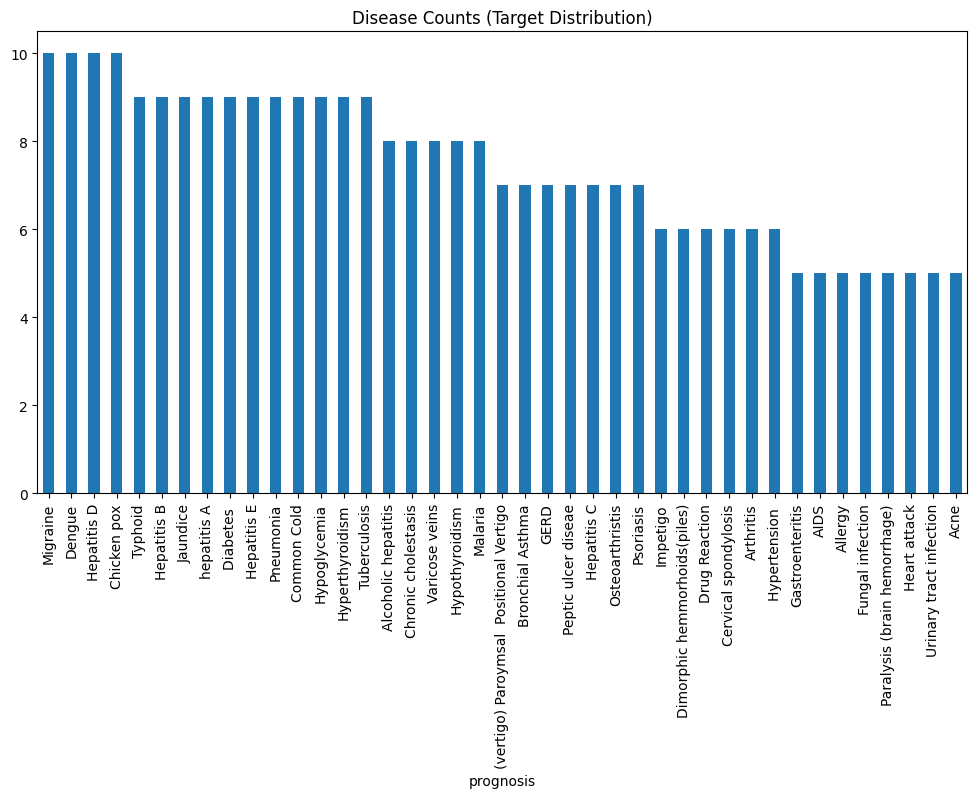

In [11]:
# Target analysis
print("Unique classes:", df["prognosis"].nunique())
plt.figure(figsize=(12,6))
df["prognosis"].value_counts().plot(kind="bar")
plt.title("Disease Counts (Target Distribution)")
plt.show()

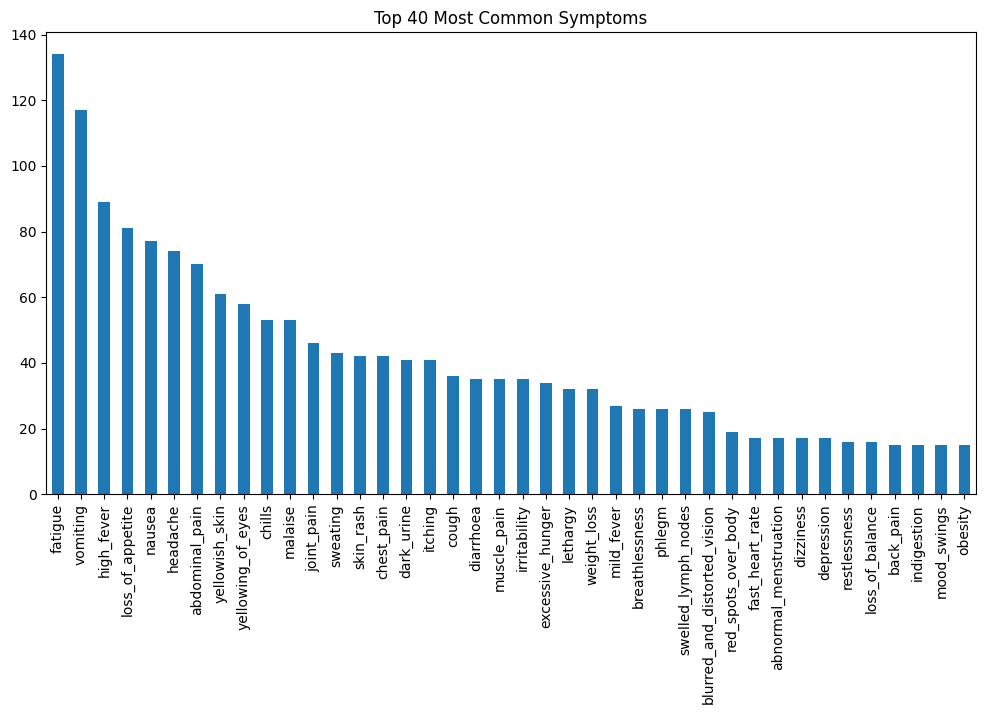

In [14]:
# Symptom prevalence
symptom_counts = df.drop(columns=["prognosis"]).sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
symptom_counts.head(40).plot(kind="bar")
plt.title("Top 40 Most Common Symptoms")
plt.show()

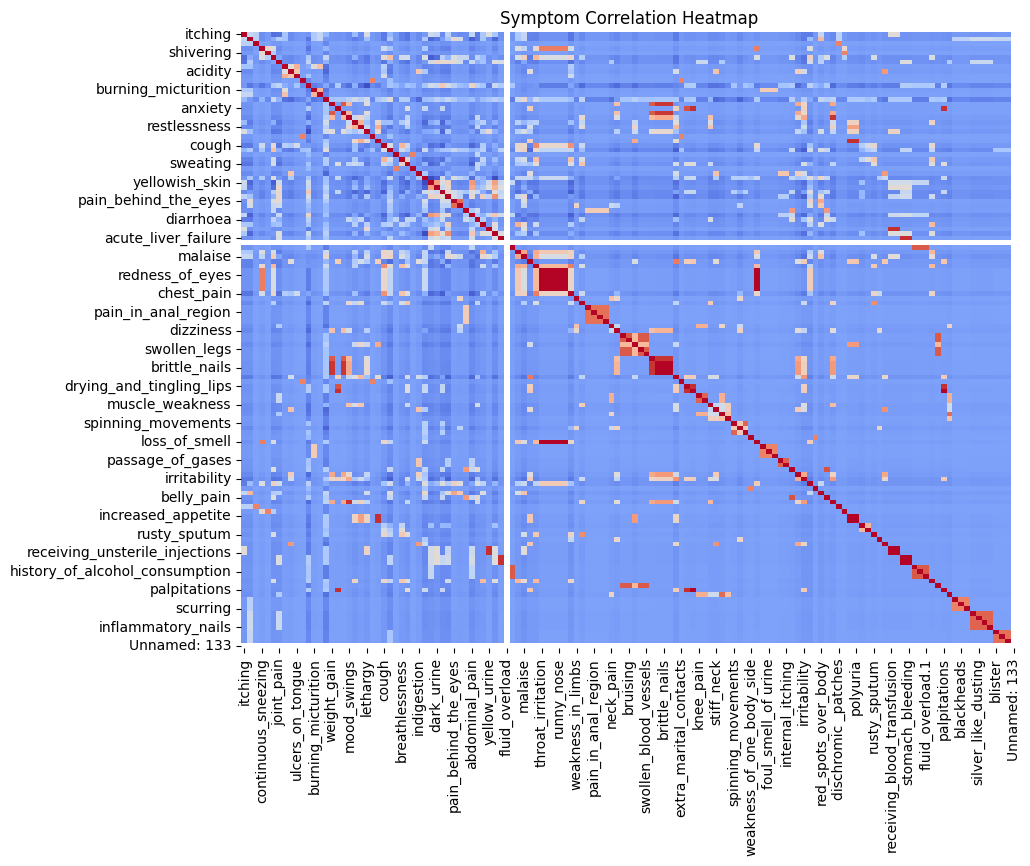

In [15]:
# Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns=["prognosis"]).corr(), cmap="coolwarm", cbar=False)
plt.title("Symptom Correlation Heatmap")
plt.show()

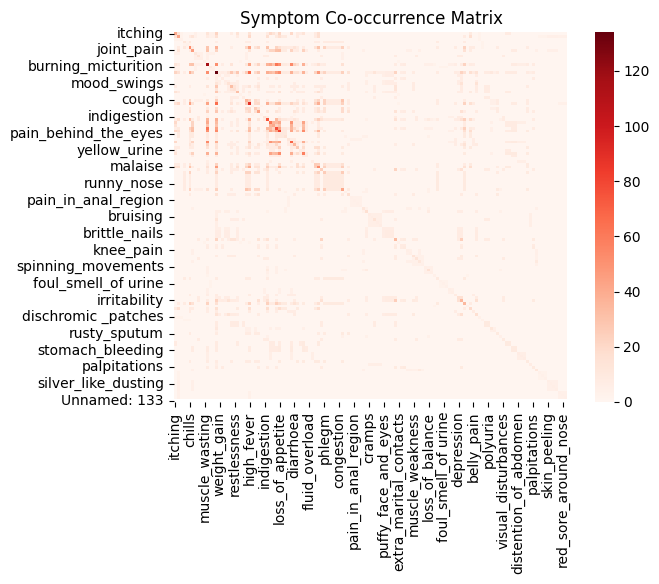

In [16]:
# Co-occurrence matrix (optional)
co_matrix = df.drop(columns=["prognosis"]).T.dot(df.drop(columns=["prognosis"]))
sns.heatmap(co_matrix, cmap="Reds")
plt.title("Symptom Co-occurrence Matrix")
plt.show()

In [19]:
filtered = df[df["prognosis"] == "Bronchial Asthma"]
result = filtered.loc[:, (filtered == 1).any(axis=0)]
result

,fatigue,cough,high_fever,breathlessness,family_history,mucoid_sputum
90,1,1,1,1,1,1
91,0,1,1,1,1,1
92,1,0,1,1,1,1
93,1,1,0,1,1,1
94,1,1,1,0,1,1
95,1,1,1,1,0,1
96,1,1,1,1,1,0


In [11]:
df.drop("Unnamed: 133", axis=1, inplace=True)

In [12]:
df.drop("fluid_overload", axis=1, inplace=True)

<Axes: >

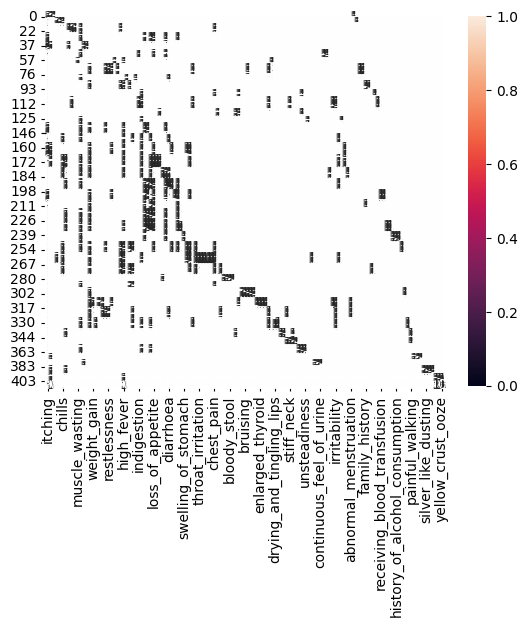

In [13]:
sns.heatmap(df.iloc[:,:-1], annot=True)

In [14]:
df["Fungal infection"]

KeyError: 'Fungal infection'